In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def warmup_constant_lr_schedule(t, min_frac=0.001, total_iters=100, delay=0.0, ramp_up=0.3):
    assert isinstance(total_iters, int)
    if isinstance(ramp_up, float):
        ramp_up_steps = total_iters*ramp_up
    elif isinstance(ramp_up, int):
        assert ramp_up<total_iters
        ramp_up_steps = ramp_up
    
    if isinstance(delay, float):
        delay_steps = total_iters*delay
    elif isinstance(delay, int):
        assert delay<total_iters
        delay_steps = delay
            
    
    if t<delay_steps:
        return 0
    elif t<=delay_steps+ramp_up_steps:
        return min_frac + (t-delay_steps)*(1-min_frac)/ramp_up_steps
    return 1.0

In [10]:
def lr_lambda(s): return warmup_constant_lr_schedule(s, min_frac=0.1, total_iters=100,
                                     ramp_up=0.1)

In [11]:
xx = np.arange(100)
yy = [lr_lambda(x) for x in xx]


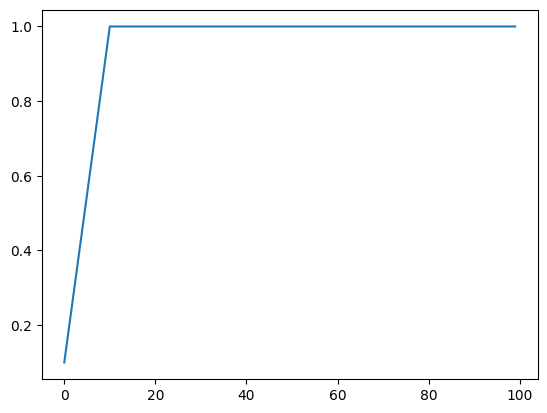

In [12]:
fig, ax = plt.subplots()
ax.plot(xx, yy)